# ID/X Partners Data Scientist Project-Based Internship Program Final Task <br> by [Arkan Syafiq At'taqy](https://www.linkedin.com/in/arkan-attaqy/)

## Introduction

As a Data Scientist at ID/X Partners, I'm involved in a project from a lending company (multifinance), where my client wants to increase accuracy in assessing and managing credit risk, so that it can optimize their business decisions and reduce potential loss.

## Goals

The goal is to develop machine learning models which can predict credit risk based on dataset provided, which includes loan data approved and rejected. In developing the model too need to carry out several stages starting with [Data Understanding](https://colab.research.google.com/drive/1-BTxenre_WhJkrMK3VcBkU6dAQUuZTp2#scrollTo=FVxJ3CpzV65Y&line=1&uniqifier=1),  [Exploratory Data Analysis (EDA)](https://colab.research.google.com/drive/1-BTxenre_WhJkrMK3VcBkU6dAQUuZTp2#scrollTo=8i4_ZRE6ZU8g), [Data Preparation](https://colab.research.google.com/drive/1-BTxenre_WhJkrMK3VcBkU6dAQUuZTp2#scrollTo=LSPvhtuiZ8lU), [Data Modeling](https://colab.research.google.com/drive/1-BTxenre_WhJkrMK3VcBkU6dAQUuZTp2#scrollTo=96kou99hqQEt) and [Evaluation](https://colab.research.google.com/drive/1-BTxenre_WhJkrMK3VcBkU6dAQUuZTp2#scrollTo=3jWyb268AIqW).

# Data Understanding 🔎

* Analyze the given dataset and make a summary
about the structure of the dataset, including the number of rows and columns.
* Identify and understand each attribute or data column.
* Conduct initial exploration of variable distributions, descriptive statistics, and general patterns in the data.

## Import Library

In [1]:
pip install shap

In [2]:
pip install optuna

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import shap

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skew
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from lightgbm import LGBMClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict

#for hypertuning
import optuna
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, roc_curve


#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Read Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/loan_data_2007_2014.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Dimension

In [5]:
print("Dataset shape: ",df.shape)

Dataset shape:  (466285, 75)


**What we found?💡**

* Dataset:
<br> There are 466,285 rows of data (entries) in the dataset and there are 75 columns (features) that store information or attributes about each entry in the dataset.

## Information of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

There are 17 Null Columns

## Column

In [7]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in Train dataset")
print(f"There are {categorical_count} Categorical Columns in Train dataset")

There are 53 Numerical Columns in Train dataset
There are 22 Categorical Columns in Train dataset


## Descriptive Statistic

In [8]:
# Desc stat of dataset numeric cols
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [9]:
# Desc stat of train dataset cat cols
df.describe(include="O").T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [10]:
# Check unique values of cat cols
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))

Unique values of  term {' 60 months', ' 36 months'}
Unique values of  grade {'F', 'B', 'A', 'E', 'D', 'C', 'G'}
Unique values of  sub_grade {'D4', 'C2', 'E3', 'A2', 'E4', 'D2', 'A3', 'G5', 'C5', 'B2', 'C3', 'B5', 'F3', 'B4', 'D1', 'F1', 'G4', 'F4', 'D5', 'B3', 'A1', 'E1', 'D3', 'E5', 'B1', 'A5', 'A4', 'F2', 'C4', 'C1', 'E2', 'G3', 'F5', 'G1', 'G2'}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Unique values of  home_ownership {'MORTGAGE', 'OWN', 'OTHER', 'RENT', 'NONE', 'ANY'}
Unique values of  verification_status {'Not Verified', 'Verified', 'Source Verified'}
Unique values of  issue_d {'Jan-10', 'Oct-08', 'Jul-10', 'Sep-10', 'Aug-10', 'Sep-14', 'Mar-12', 'Mar-14', 'Nov-09', 'May-11', 'Jul-09', 'Nov-14', 'Sep-07', 'Aug-14', 'Dec-12', 'Dec-11', 'Oct-13', 'Jan-11', 'Aug-09', 'Dec-09', 'Feb-08', 'Oct-10', 'Aug-07', 'Sep-12', 'Feb-13', 'Jan-08', 'Apr-12', 'Apr-13', 'Jun-09', 'Jul-07', 'Aug-13', 'Dec-13', 'Aug-11', 'Dec-14', 'Oct-14', 'Feb-10', 'Sep-11', 'Sep-09', 'May-08', 'Nov-07', 'Feb-14', 'Jan-14', 'Apr-10', 'Mar-11', 'Jul-11', 'Nov-08', 'Jun-13', 'Sep-08', 'Apr-14', 'Dec-07', 'May-09', 'Jul-13', 'Dec-10', 'Jun-08', 'Feb-12', 'May-10', 'Mar-09', 'Apr-09', 'Nov-10', 'Jan-09', 'Apr-11', 'Oct-11', 'Jun-10', 'Jun-12', 'May-14', 'Apr-08', 'Oct-07', 'Sep-13', 'Jul-08', 'May-13', 'Jun-11', 'Jun-14', 'Mar-10', 'Jun-07', 'Feb-11', 'Mar-13', 'Nov-11', 'Mar-08', 'Nov-13', 'Oct-12', 'N

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Unique values of  zip_code {'587xx', '734xx', '044xx', '744xx', '429xx', '789xx', '711xx', '191xx', '333xx', '151xx', '790xx', '444xx', '049xx', '211xx', '016xx', '302xx', '169xx', '873xx', '025xx', '307xx', '503xx', '344xx', '846xx', '347xx', '596xx', '190xx', '040xx', '675xx', '965xx', '670xx', '282xx', '291xx', '737xx', '075xx', '608xx', '634xx', '471xx', '499xx', '511xx', '342xx', '603xx', '905xx', '364xx', '990xx', '121xx', '921xx', '879xx', '999xx', '369xx', '071xx', '340xx', '920xx', '193xx', '644xx', '401xx', '528xx', '998xx', '615xx', '933xx', '988xx', '172xx', '915xx', '319xx', '547xx', '514xx', '531xx', '246xx', '441xx', '816xx', '398xx', '488xx', '069xx', '464xx', '680xx', '661xx', '447xx', '230xx', '882xx', '242xx', '751xx', '387xx', '633xx', '904xx', '248xx', '170xx', '440xx', '927xx', '834xx', '338xx', '381xx', '266xx', '278xx', '836xx', '132xx', '312xx', '275xx', '427xx', '889xx', '285xx', '212xx', '622xx', '443xx', '088xx', '726xx', '096xx', '613xx', '094xx', '917xx', 

## Check Duplicate

In [11]:
print("Duplicates in Train Dataset: ",df.duplicated().sum())

Duplicates in Train Dataset:  0


## Check Missing Value

In [12]:
print("Checking Null Values in Train Dataset")
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)

# Menyortir DataFrame berdasarkan kolom '% of Missing Values' dalam urutan menurun
missing_data = missing_data.sort_values(by="% of Missing Values", ascending=False)

missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
inq_last_12m,466285,100.00
total_bal_il,466285,100.00
annual_inc_joint,466285,100.00
dti_joint,466285,100.00
verification_status_joint,466285,100.00
open_acc_6m,466285,100.00
open_il_12m,466285,100.00
open_il_24m,466285,100.00
mths_since_rcnt_il,466285,100.00
open_il_6m,466285,100.00


**What we found?💡**

There are missing values in the data.<br><br>
**Nilai yang hilang > 70%:**
* annual_inc_joint               
* dti_joint                    
* verification_status_joint      
* open_acc_6m                   
* open_il_6m                     
* open_il_12m                    
* open_il_24m                  
* mths_since_rcnt_il
* total_bal_il           
* il_util                  
* open_rv_12m                    
* open_rv_24m                    
* max_bal_bc                     
* all_util                       
* inq_fi                         
* total_cu_tl                    
* inq_last_12m
* mths_since_last_record
* mths_since_last_major_derog
* desc <br><br>

**Nilai yang hilang < 70%:**
* mths_since_last_delinq
* next_payment_d
* tot_cur_bal
* tot_coll_amt
* total_rev_hi_lim
* emp_title
* emp_length
* and 13 other variables that have missing values between 0.001% - 0.08%

## Check Outlier

In [13]:
print("Checking Outliers in Train Dataset")

# Fungsi untuk mendeteksi outlier berdasarkan IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Daftar kolom numerik dalam dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()

outliers_data = []

for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_data.append({"Column": col, "No. of Outliers": len(outliers)})

outliers_data = pd.DataFrame(outliers_data)
outliers_data = outliers_data.sort_values(by="No. of Outliers", ascending=False)
outliers_data

Checking Outliers in Train Dataset


,Column,No. of Outliers
10,delinq_2yrs,83302
28,last_pymnt_amnt,70346
15,pub_rec,61363
36,tot_coll_amt,49750
11,inq_last_6mths,36785
24,total_rec_int,31138
26,recoveries,24371
20,out_prncp_inv,23381
19,out_prncp,23331
27,collection_recovery_fee,23206


**What we found?💡**

There are outliers in the data

# Exploratory Data Analysis 📊

* Visualize data using graphs and plots to understand the relationship between variables.
* Analyze the correlation between features in the dataset.
* Conduct univariate and bivariate analysis for gain deeper insight into the data.

## Correlation Between Features

In [14]:
# Deteksi tipe data kolom
kategorikal_cols = df.select_dtypes(include=['object']).columns
numerikal_cols = df.select_dtypes(exclude=['object']).columns

print("Kolom Kategorikal:")
print(kategorikal_cols)

print("\nKolom Numerik:")
print(numerikal_cols)

jumlah_kategorikal_cols = len(kategorikal_cols)
jumlah_numerikal_cols = len(numerikal_cols)

print("\nJumlah Kolom Kategorikal:", jumlah_kategorikal_cols)
print("Jumlah Kolom Numerik:", jumlah_numerikal_cols)

Kolom Kategorikal:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], dtype='object')

Kolom Numerik:
Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot

In [15]:
categorical_cols = ['term', 'grade', 'home_ownership', 'emp_length', 'pymnt_plan', 'purpose', 'title', 'verification_status']
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'total_acc', 'revol_util',
                'mths_since_last_delinq', 'collections_12_mths_ex_med']

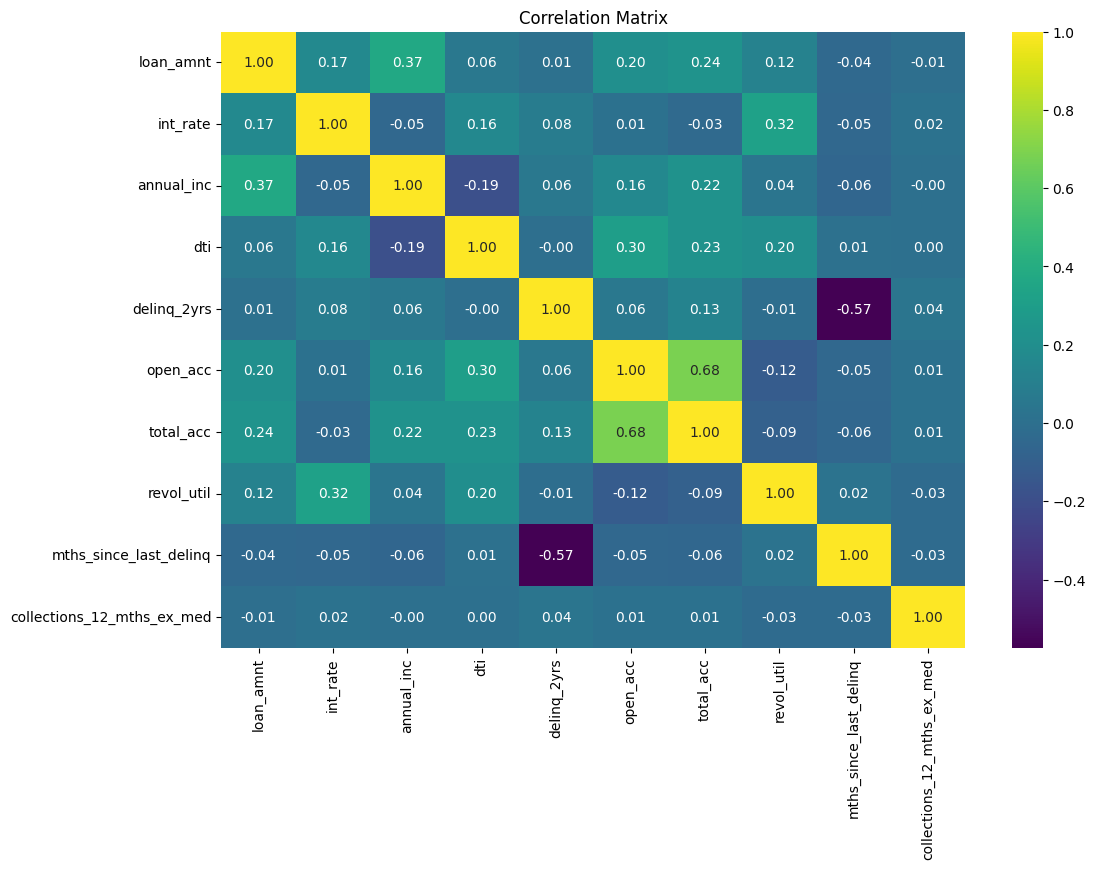

In [16]:
subset_df = df[numerical_cols]

# Analisis Korelasi
correlation_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Mengevaluasi hubungan statistik antara variabel kategorikal dan variabel target
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['loan_status'])
    chi2, p, _, _ = chi2_contingency(cross_tab)
    print(f'Chi-Square Test for {col} vs loan_status:')
    print(f'Chi2 value: {chi2}')
    print(f'p-value: {p}\n')

Chi-Square Test for term vs loan_status:
Chi2 value: 14216.950986882766
p-value: 0.0

Chi-Square Test for grade vs loan_status:
Chi2 value: 20056.29769992114
p-value: 0.0

Chi-Square Test for home_ownership vs loan_status:
Chi2 value: 2996.9663827821996
p-value: 0.0

Chi-Square Test for emp_length vs loan_status:
Chi2 value: 2739.286208414691
p-value: 0.0

Chi-Square Test for pymnt_plan vs loan_status:
Chi2 value: 155.72336057186493
p-value: 1.2524486904293235e-29

Chi-Square Test for purpose vs loan_status:
Chi2 value: 11947.852944966911
p-value: 0.0

Chi-Square Test for title vs loan_status:
Chi2 value: 887036.770549122
p-value: 0.0

Chi-Square Test for verification_status vs loan_status:
Chi2 value: 7546.378726469077
p-value: 0.0



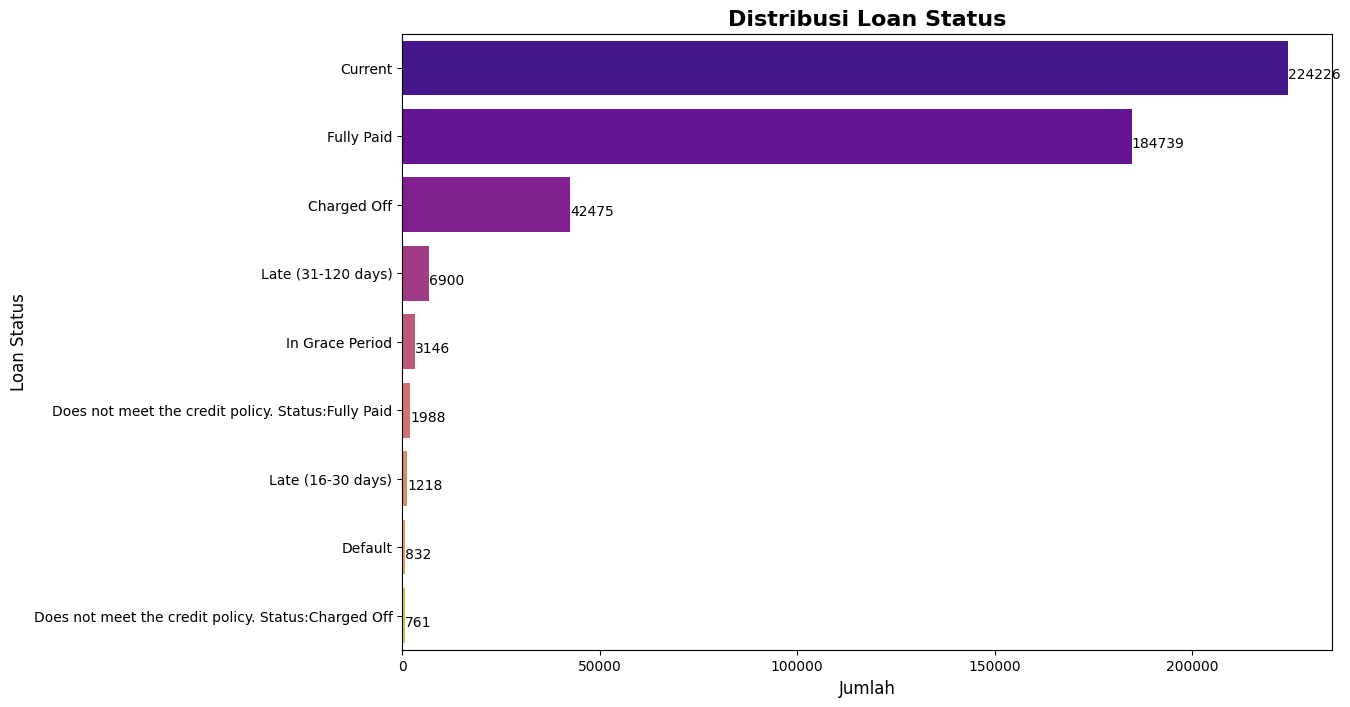

In [18]:
# Visualisasi distribusi nilai pada variabel target
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y='loan_status', data=df, order=df['loan_status'].value_counts().index, palette='plasma', ax=ax)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_x() + p.get_width(), p.get_y() + 0.5),
                ha='left', va='center', color='black', fontsize=10)

ax.set_title('Distribusi Loan Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Jumlah', fontsize=12)
ax.set_ylabel('Loan Status', fontsize=12)

plt.show()

**Conclusion from Descriptive Statistics**
1. The data consists of 466285 rows and 75 columns
2. Assumes 18 columns that are relevant for EDA (8 categorical columns, 10 numerical columns, and 2 datadate columns)
3. 10 numerical columns consisting of: loan_amnt, int_rate, annual_inc, dti, delinq_2yrs, open_acc, total_acc, revol_util, mths_since_last_delinq, collections_12_mths_ex_med
4. 8 categorical columns, consisting of: term, grade, home_ownership, emp_length, pymnt_plan, purpose, title, verification_status

## Univariate Analysis & Multivariate Analysis

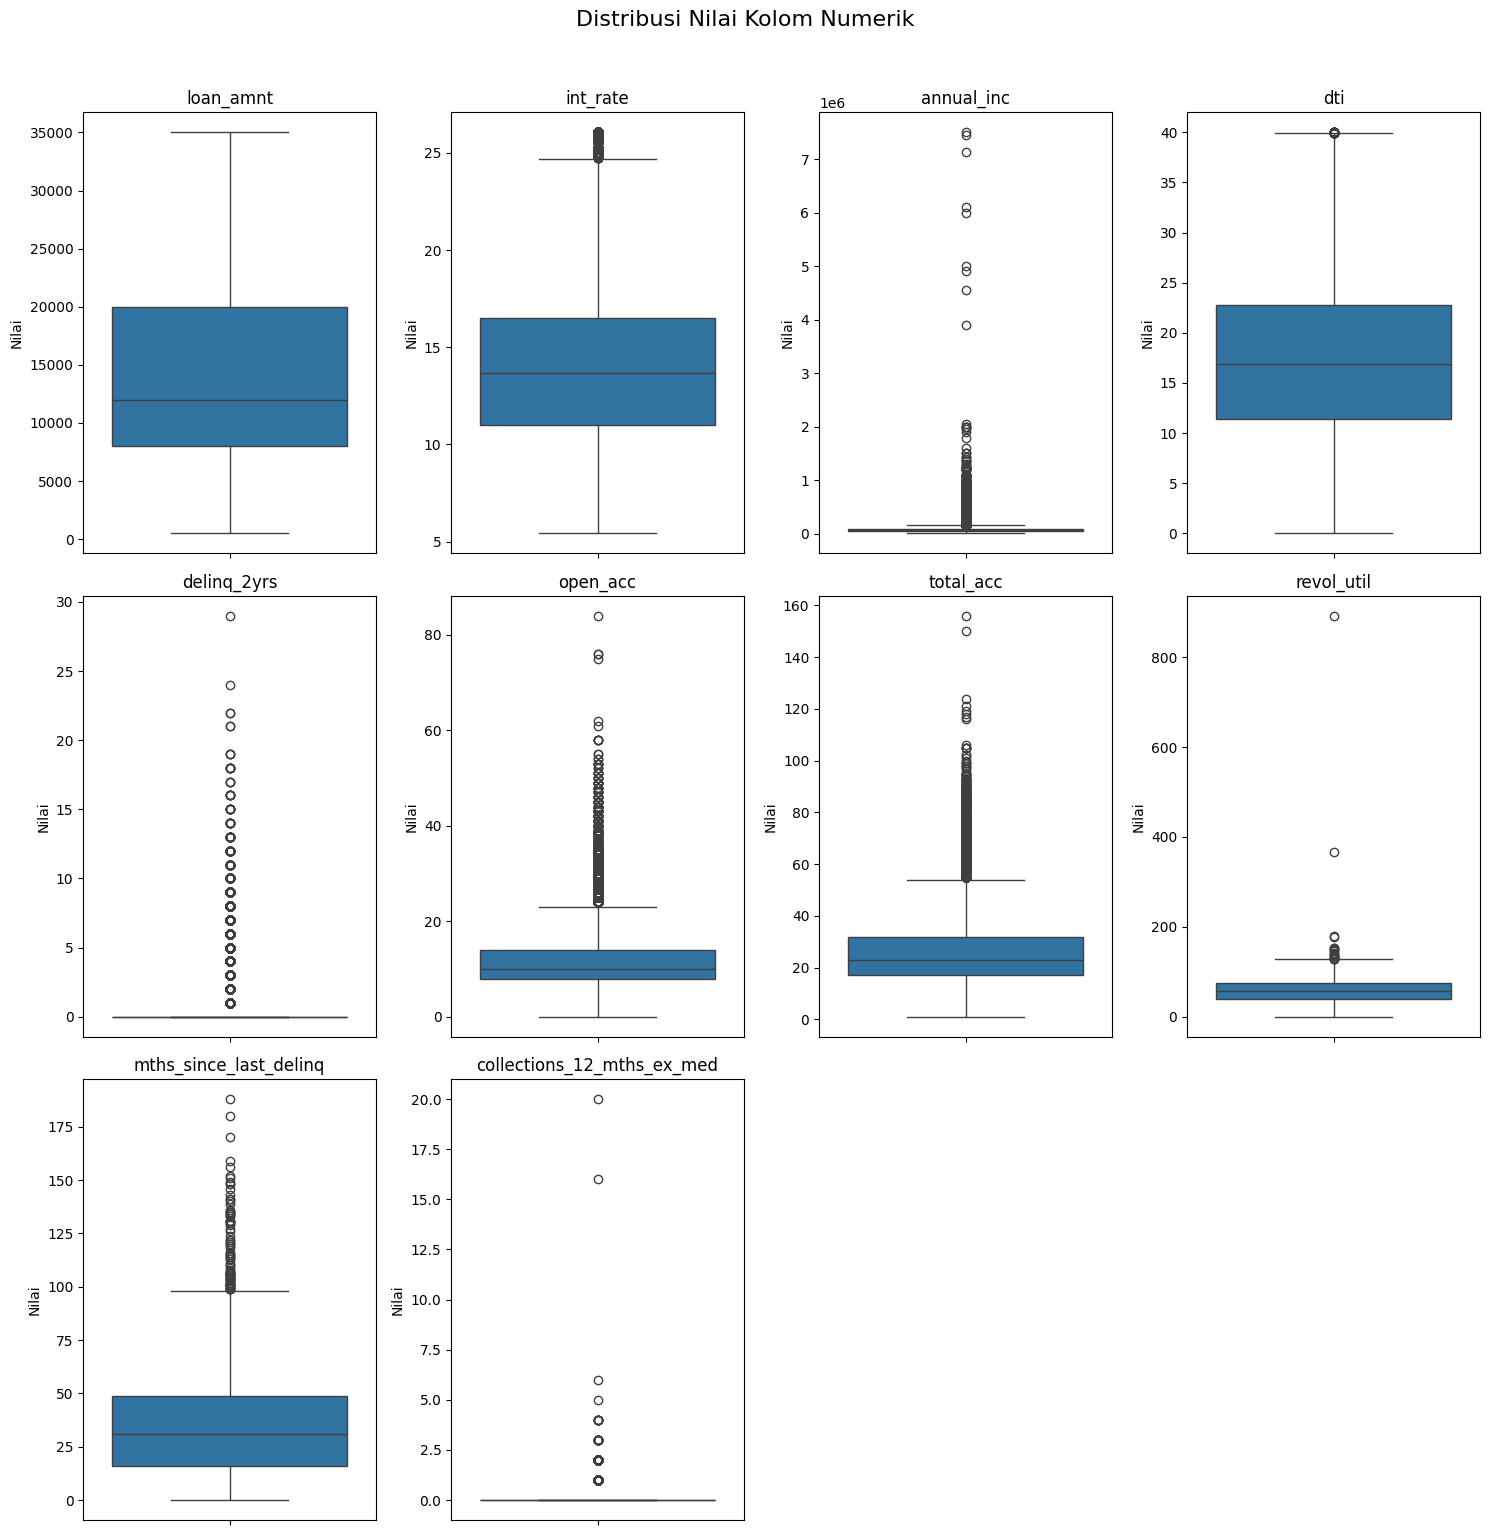

In [19]:
# analisis setiap kolom numerik untuk melihat distribusi nilai
features_nums = numerical_cols

n = len(features_nums)
ncols = 4
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, feature in enumerate(features_nums):
    r = i // ncols
    c = i % ncols
    ax = axs[r, c]
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('Nilai')

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.suptitle('Distribusi Nilai Kolom Numerik', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

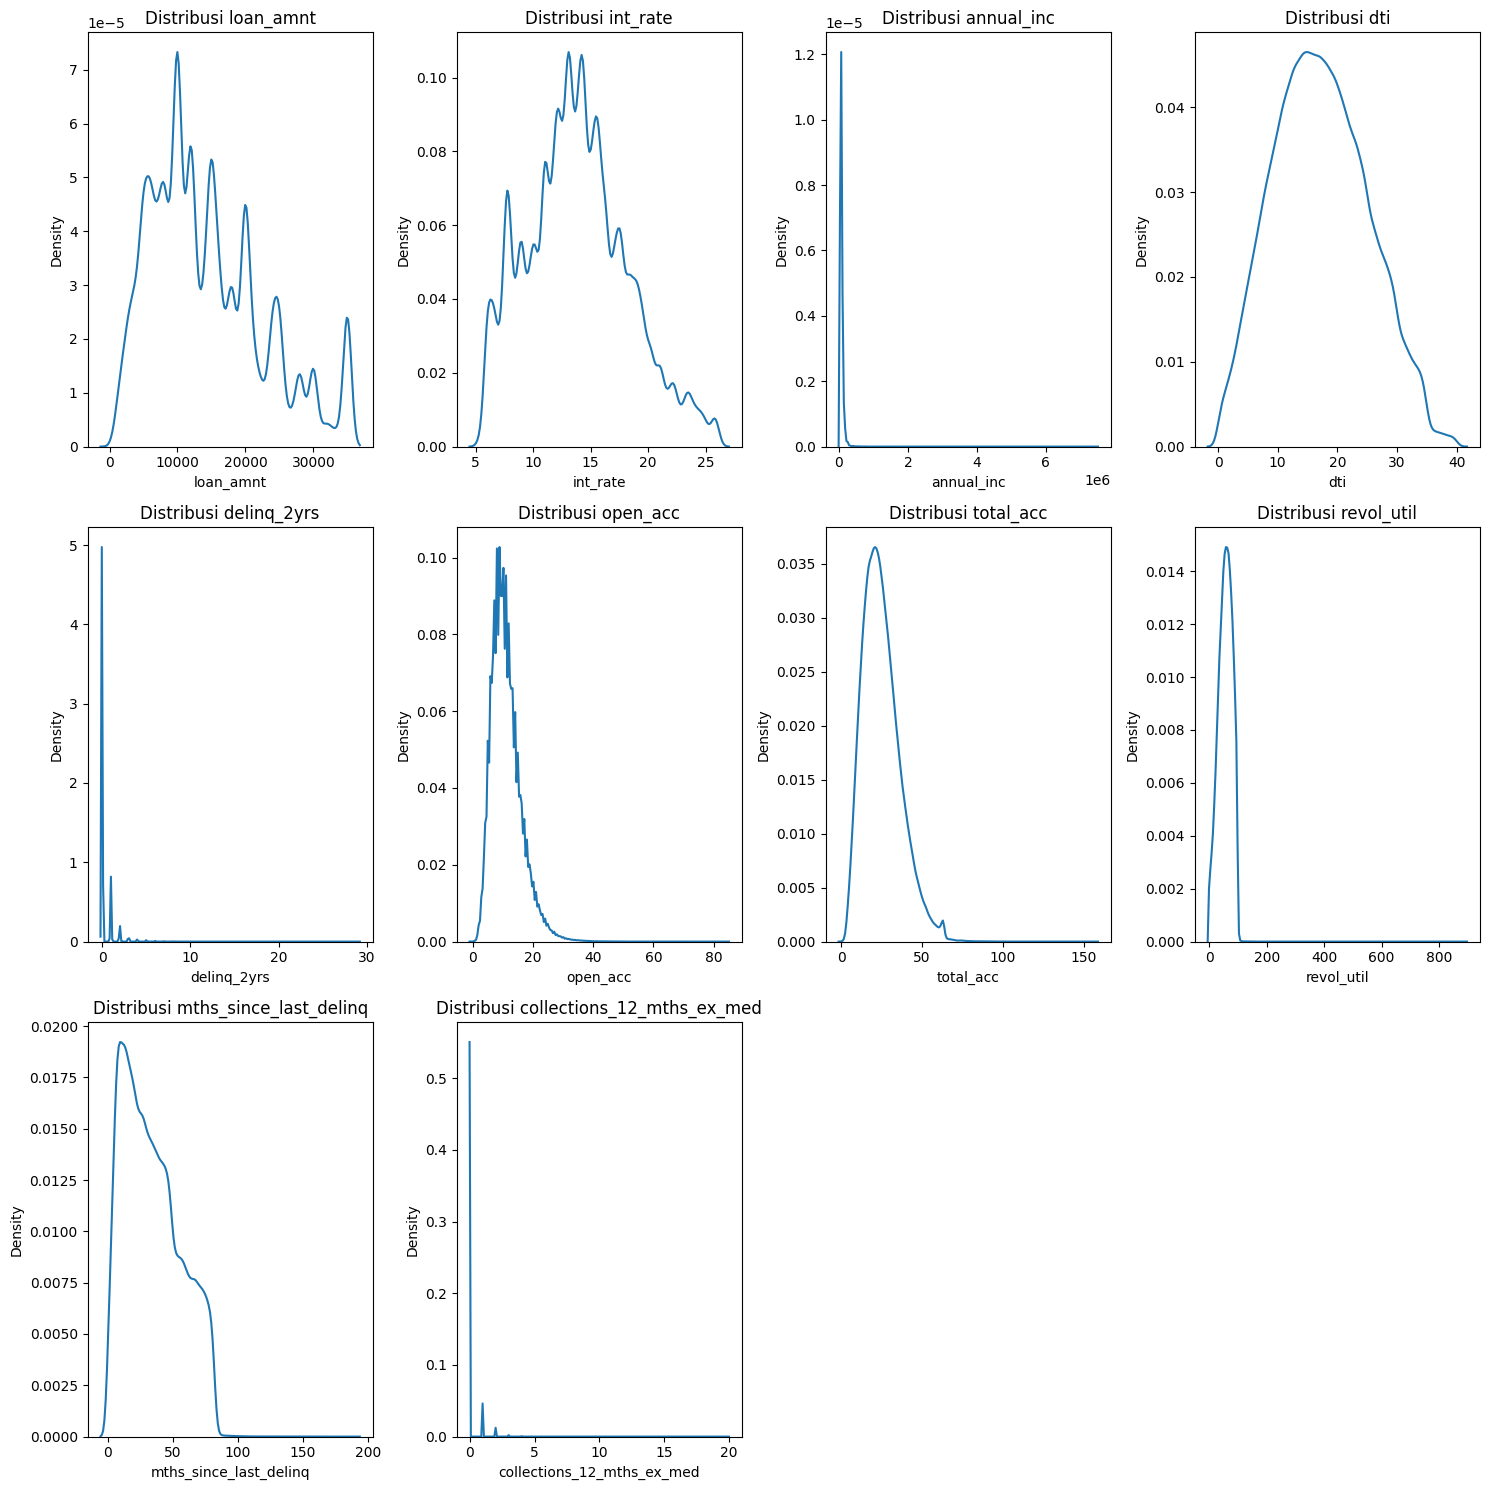

In [20]:
# Visualaliasi distribusi fitur-fitur numerik dalam features_nums
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, feature in enumerate(features_nums):
    r = i // ncols
    c = i % ncols
    ax = axs[r, c]
    sns.kdeplot(x=df[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribusi {feature}')

if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

# Data Preparation 🔄

* Handle missing values, either by removing them or fill in with appropriate imputation techniques.
* Address outliers if necessary, either by delete it or adjust its value.
* Encoding the categorical variable if required.
* Perform scaling or normalization on numerical features if needed.
* Divide data into train set and test set.

## Handling Missing Value

In [21]:
cols_misval = ['desc','mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m']
df.drop(columns=cols_misval,inplace=True)
df_prep = df.copy()
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

**Deletes columns with more than 70% null data**

- *Data Quality :* Columns with a large amount of missing data may not provide enough information for machine learning.
- *Bias :* If we try to fill in missing data with multiple imputation methods, there is a big risk that we might introduce bias into our data.
- *Model Complexity :* Removing columns with a lot of missing data can help reduce the dimensionality of the data and can help prevent overfitting.

A threshold of 70% might be chosen as a balance point between retaining as much information as possible and avoiding noise or bias that might be introduced by missing data.

**Why we do this**❓

We make a copy of the train data, namely `df_prep` to keep the original train data, the data we use for the next process is `df_prep`

### Handling Categorical Columns

In [22]:
# Categorical columns
for col in df_prep.select_dtypes(include='object'):
    df_prep[col] = df_prep[col].fillna(df_prep[col].mode().iloc[0])
print("Updated Missing Values")
df_prep.isnull().sum()

Updated Missing Values


Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                         0
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                   0
i

**Why we do this**❓

In categorical data, we fill in the missing values with the mode value

### Handling Numeric Columns

In [23]:
# Numerical columns
for col in df_prep.select_dtypes(exclude='object'):
    df_prep[col] = df_prep[col].fillna(df_prep[col].median())
df_prep.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_ba

**Why we do this**❓

In numerical data, we fill in the missing values with the median value

### Handling Target Variable Column

In [24]:
# loan_menjadi target karena terdapat informasi pembayaran konsumen
df_prep["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [25]:
# encoding target variable
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':1,
               'In Grace Period':1,
               'Late (16-30 days)':0}
# Buat nilai yang dipetakan di kolom baru
df_prep['loan_status'] = df_prep['loan_status'].map(target_dict)
# Review dataset
df_prep.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,31.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,31.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,31.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


Classifying each loan in the dataset into two main categories, namely "Good Loans (1)" and "Bad Loans (0)", based on the final status of each loan. This classification is the first step in understanding and managing credit risk. Classification Criteria:

Good Loans (1):
- 'Current': Loans that are still ongoing and payments are made according to schedule.
- 'Fully Paid': A loan that has been fully repaid by the borrower.
- 'In Grace Period': Loans that are still within the repayment grace period.
- 'Does not meet the credit policy. Status:Fully Paid': A loan that, although it does not meet the credit policy, has been paid in full.

Bad Loans (0):
- 'Charged Off': A loan that is deemed irrecoverable and written off as a loss.
- 'Late (16-30 days)': Loans that have a payment delay of between 16 to 30 days.
- 'Late (31-120 days)': Loans that have a late payment between 31 and 120 days.
- 'Default': A loan that cannot be recovered and is considered to be in default.
- 'Does not meet the credit policy. Status:Charged Off': Loans that, despite not meeting credit policy, are considered non-recoverable.

## Feature Engineering

In [26]:
# Bulan dimana batas kredit peminjam yang paling awal dilaporkan dibuka
df_prep['earliest_cr_line'].value_counts()
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format='%b-%y')

In [27]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [28]:
# Set standard datetime
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format='%b-%y') # Bulan dimana batas kredit peminjam yang paling awal dilaporkan dibuka
df_prep['earliest_cr_line'] = df_prep['earliest_cr_line'].apply(lambda x: date_time(x))
df_prep['issue_d'] = pd.to_datetime(df_prep['issue_d'], format='%b-%y') # Bulan Pendanaan
df_prep['last_pymnt_d'] = pd.to_datetime(df_prep['last_pymnt_d'],format='%b-%y') # Pembayaran Bulan lalu yang telah diterima
df_prep['last_credit_pull_d'] = pd.to_datetime(df_prep['last_credit_pull_d'],format='%b-%y') # Bulan terakhir LC menarik kredit untuk pinjaman ini
df_prep[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(5)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01,2016-01-01


**A new column is needed for datetime:**

* **`pymnt_time`** = number of months between the loan being funded (**`issue_d`**) and the last payment received (**`last_pymnt_d`**)
* **`credit_pull_year`** = number of years between the borrower's earliest reported open credit line (**`earliest_cr_line`**) and the most recent LC that pulled credit for this loan (**`last_credit_pull_d`**)

In [29]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

def diff_year(d1, d2):
    return (d1.year - d2.year)

In [30]:
((df_prep.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()
((df_prep.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

False

In [31]:
df_prep['pymnt_time'] = df_prep.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df_prep['credit_pull_year'] = df_prep.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [32]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  466285 non-null  int64         
 1   id                          466285 non-null  int64         
 2   member_id                   466285 non-null  int64         
 3   loan_amnt                   466285 non-null  int64         
 4   funded_amnt                 466285 non-null  int64         
 5   funded_amnt_inv             466285 non-null  float64       
 6   term                        466285 non-null  object        
 7   int_rate                    466285 non-null  float64       
 8   installment                 466285 non-null  float64       
 9   grade                       466285 non-null  object        
 10  sub_grade                   466285 non-null  object        
 11  emp_title                   466285 non-

In [33]:
df_prep.to_csv('df_clean.csv', index=False)
!cp 'df_clean.csv' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'
print('Saving cleaned data is done!')

Saving cleaned data is done!


In [34]:
df_clean = pd.read_csv("/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/df_clean.csv")
df_clean.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,31.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,31.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,31.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


In [35]:
df_clean.describe(exclude=['int','float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,205475,11,6,3,91,2,466285,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,2014-10-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,2000-10-01,f,2016-01-01,Feb-16,2016-01-01,INDIVIDUAL
freq,337953,136929,31686,32987,171057,235875,168055,38782,466276,1,274195,164096,5304,71450,3703,303005,179996,435607,327741,466285


In [36]:
df_clean.dtypes.value_counts()

float64    27
object     20
int64      10
Name: count, dtype: int64

In [37]:
non_used = ['Unnamed: 0','id','member_id','policy_code', 'loan_status']
uni_dist = df_clean.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

## Correlation Matrix

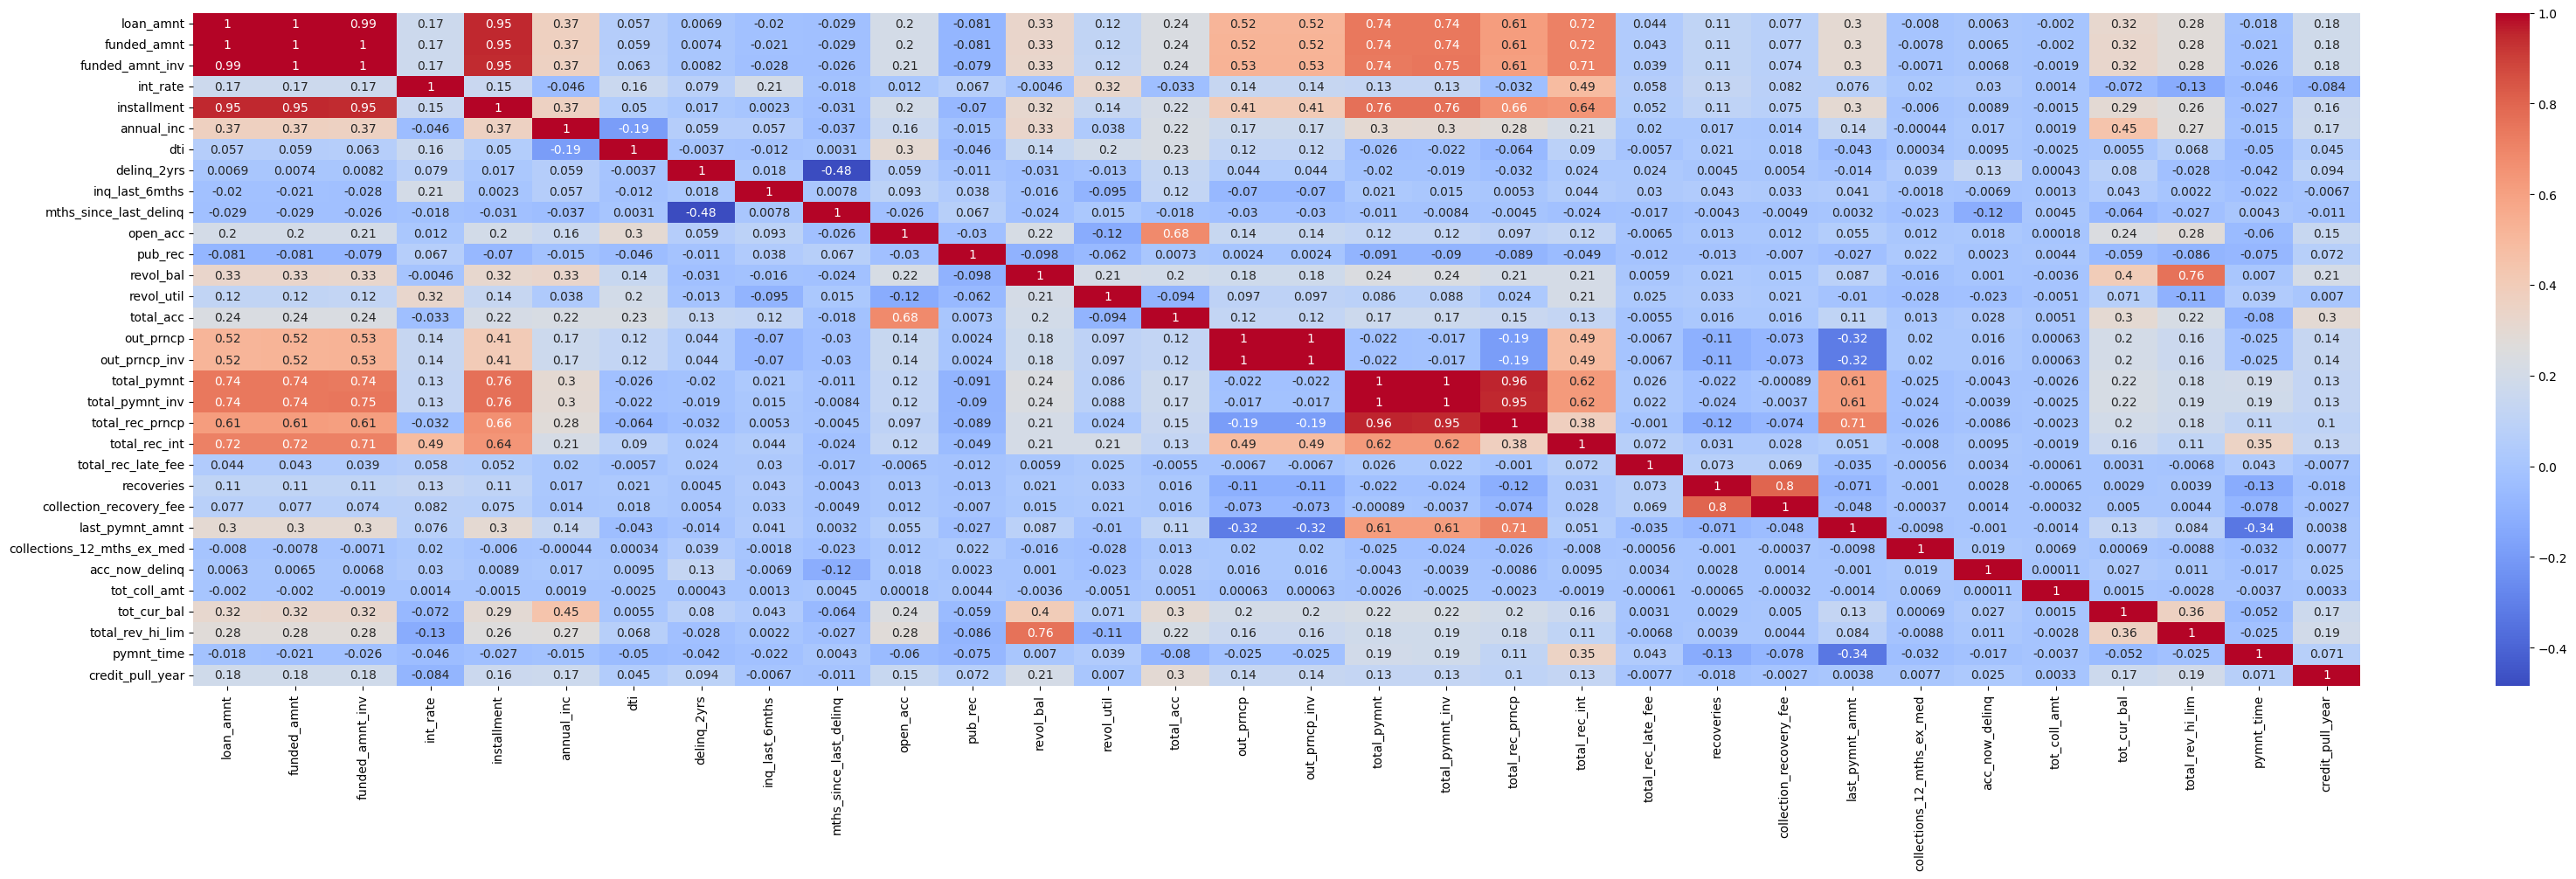

In [38]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = df_clean.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='coolwarm', annot = True);

In [39]:
def top_correlation (df_clean,n):
    corr_matrix = df_clean.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)

High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999998
1,loan_amnt,funded_amnt,0.998548
2,funded_amnt,funded_amnt_inv,0.996125
3,total_pymnt,total_pymnt_inv,0.995862
4,loan_amnt,funded_amnt_inv,0.994347
5,total_pymnt,total_rec_prncp,0.956658
6,total_pymnt_inv,total_rec_prncp,0.952158
7,funded_amnt,installment,0.951787
8,loan_amnt,installment,0.949666
9,funded_amnt_inv,installment,0.947387


In [40]:
df_clean_corr = top_correlation(uni_dist,41)
df_clean_corr.to_excel('df_clean_corr.xlsx', index=False)
!cp 'df_clean_corr.xlsx' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'
print('Saving correlation data is done!')

Saving correlation data is done!


In [41]:
# Menghapus feature yang memiliki lebih dari 500 unique value dan 1 unique value

removed_unused = ['Unnamed: 0','id','member_id','next_pymnt_d','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [42]:
df_cleaned = df_clean[df_clean.columns[~df_clean.columns.isin(removed_all)]].reset_index(drop=True)

In [43]:
df_cleaned.to_csv('df_cleaned.csv', index=False)
!cp 'df_cleaned.csv' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'
print('Saving cleaned data is done!')

Saving cleaned data is done!


## Encoding

One-hot encoding is used to convert categorical variables into a form that can be processed by a machine learning model, by substituting the categorical variables into a binary column (0 or 1) for each possible category. This is necessary because most machine learning algorithms work with numerical data and cannot handle categorical variables directly. With one-hot encoding, category information can be represented numerically without causing interpretation problems.

In [44]:
df_cleaned = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/df_cleaned.csv')
df_cleaned.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,31.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,31.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,31.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20


In [45]:
df_cleaned["term"].unique()

array([' 36 months', ' 60 months', '36 months'], dtype=object)

In [46]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

In [47]:
df_cleaned["term"] = df_cleaned["term"].apply(lambda x: text_num(x))
df_cleaned.head(5)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,31.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,31.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,31.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20


In [48]:
df_cleaned["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [49]:
# Define a dictionary for encoding ordinal variable
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
# Create the mapped values in a new column
df_cleaned["grade"] = df_cleaned["grade"].map(target_dict)

In [50]:
df_cleaned["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [51]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [52]:
df_cleaned['SubGrade_A'] = df_cleaned["sub_grade"].apply(f_A)
df_cleaned['SubGrade_B'] = df_cleaned["sub_grade"].apply(f_B)
df_cleaned['SubGrade_C'] = df_cleaned["sub_grade"].apply(f_C)
df_cleaned['SubGrade_D'] = df_cleaned["sub_grade"].apply(f_D)
df_cleaned['SubGrade_E'] = df_cleaned["sub_grade"].apply(f_E)
df_cleaned['SubGrade_F'] = df_cleaned["sub_grade"].apply(f_F)
df_cleaned['SubGrade_G'] = df_cleaned["sub_grade"].apply(f_G)
df_cleaned = df_cleaned.drop(axis=1, columns="sub_grade")

In [53]:
df_cleaned["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [54]:
# Define a dictionary for encoding ordinal variable
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8,
               '9 years':9,
               '10+ years':10}
# Create the mapped values in a new column
df_cleaned["emp_length"] = df_cleaned["emp_length"].map(target_dict)

In [55]:
df_cleaned["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [56]:
# Define a dictionary for aggregating variable
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df_cleaned["home_ownership"] = df_cleaned["home_ownership"].map(target_dict)

In [57]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['home_ownership'], prefix='home_ownership')], axis=1)
df_cleaned.drop(['home_ownership'], axis=1, inplace=True)
df_cleaned.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,31.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,False,False,False,True
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,31.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,False,False,False,True
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,31.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,False,False,False,True
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,False,False,False,True
4,60,12.69,67.79,5,1,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,False,False,False,True


In [58]:
df_cleaned["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [59]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned["verification_status"], prefix="verification_status")], axis=1)
df_cleaned.drop(["verification_status"], axis=1, inplace=True)
df_cleaned.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,n,credit_card,27.65,0.0,1.0,31.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,False,False,False,True,False,False,True
1,60,15.27,59.83,4,0,30000.0,0,n,car,1.00,0.0,5.0,31.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,False,False,False,True,False,True,False
2,36,15.96,84.33,4,10,12252.0,1,n,small_business,8.72,0.0,2.0,31.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,False,False,False,True,True,False,False
3,36,13.49,339.31,4,10,49200.0,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,False,False,False,True,False,True,False
4,60,12.69,67.79,5,1,80000.0,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,False,False,False,True,False,True,False


In [60]:
df_cleaned['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [61]:
# Define a dictionary for encoding ordinal variable
target_dict = {'n':0,
               'y':1}
# Create the mapped values in a new column
df_cleaned["pymnt_plan"] = df_cleaned["pymnt_plan"].map(target_dict)

In [62]:
df_cleaned["loan_status"].unique()

array([1, 0])

In [63]:
df_cleaned["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [64]:
# Define a dictionary for aggregating variable
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
# Create the mapped values in a new column
df_cleaned["purpose"] = df_cleaned["purpose"].map(target_dict)

In [65]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['purpose'], prefix='purpose')], axis=1)
df_cleaned.drop(['purpose'], axis=1, inplace=True)
df_cleaned.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,31.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,False,False,False,True,False,False,True,True,False,False,False,False,False
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,31.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,False,False,False,True,False,True,False,False,False,False,False,True,False
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,31.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,True
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False
4,60,12.69,67.79,5,1,80000.0,1,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False


In [66]:
df_cleaned["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [67]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned["initial_list_status"], prefix="initial_list_status")], axis=1)
df_cleaned.drop(["initial_list_status"], axis=1, inplace=True)
df_cleaned.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,31.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,31.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,31.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False
4,60,12.69,67.79,5,1,80000.0,1,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False


In [68]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 466285 non-null  int64  
 1   int_rate                             466285 non-null  float64
 2   installment                          466285 non-null  float64
 3   grade                                466285 non-null  int64  
 4   emp_length                           466285 non-null  int64  
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   pymnt_plan                           466285 non-null  int64  
 8   dti                                  466285 non-null  float64
 9   delinq_2yrs                          466285 non-null  float64
 10  inq_last_6mths                       466285 non-null  float64
 11  mths_since_la

## Feature Importance

IV and WoE are metrics commonly used in credit analysis to assess the predictive power of an independent variable against a target variable.

- *Information Value (IV):* Measures how well a variable can differentiate between two classes in the target variable. The higher the IV value, the better the variable is at predicting the target variable.

- *Weight of Evidence (WoE):* Measures the strength of the relationship between the independent variable and the target variable. WoE describes the logarithmic change in odds between two classes of target variables.

In [69]:
# Implementasikan perhitungan Information Value (IV) dan Weight of Evidence (WoE) untuk setiap variabel independen dalam dataset.
def iv_woe(data, target, bins=10, show_woe=False):

    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns

    # Run WoE and IV
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is : " + str(round(d['IV'].sum(),6)))
        temp = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        if show_woe == True:
            print(d)

    return newDF, woeDF

iv, woe = iv_woe(df_cleaned, target='loan_status', bins=20)

Information value of term is : 0.039371
Information value of int_rate is : 0.332552
Information value of installment is : 0.007554
Information value of grade is : 0.293442
Information value of emp_length is : 0.002395
Information value of annual_inc is : 0.052782
Information value of pymnt_plan is : 0.000198
Information value of dti is : 0.026486
Information value of delinq_2yrs is : 0.000118
Information value of inq_last_6mths is : 0.036261
Information value of mths_since_last_delinq is : 0.000898
Information value of open_acc is : 0.000574
Information value of pub_rec is : 0.000422
Information value of revol_util is : 0.027841
Information value of total_rec_late_fee is : 0.0
Information value of collection_recovery_fee is : 0.0
Information value of last_pymnt_amnt is : 1.5494
Information value of collections_12_mths_ex_med is : 0.000335
Information value of acc_now_delinq is : 4.9e-05
Information value of tot_coll_amt is : 0.001209
Information value of tot_cur_bal is : 0.055424
Infor

The general rule states that all variables with IV < 0.02 are useless for prediction and IV > 0.5 have suspicious predictive power. Therefore, the following variables will not be included: pymnt_plan, last_pymnt_amnt, revol_util, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt, mths_since_last_pymnt_d, emp_length, application_type.

In [70]:
df_cleaned.drop(columns=['installment', 'emp_length', 'pymnt_plan', 'last_pymnt_amnt', 'delinq_2yrs', 'mths_since_last_delinq',
                    'open_acc', 'pub_rec', 'total_rec_late_fee', 'collection_recovery_fee','collections_12_mths_ex_med', 'acc_now_delinq',
                    'tot_coll_amt', 'pymnt_time'], axis=1, inplace=True)

## Feature Scaling

1. Normalization is carried out to overcome differences in data scale, because normalization will bring the data to a uniform range between 0 and 1. This will help machine learning algorithms that are sensitive to scale differences in data, such as logistic regression and k-nearest neighbors, to produce better results. Apart from that, normalization is also suitable for data with a non-normal or bimodal distribution.
2. Standardization because it has a distribution close to normal. Standardization changes the data into a standard normal distribution with a mean of 0 and a standard deviation of 1, thereby meeting the assumptions of machine learning algorithms which assume a normal distribution. With standardization, these variables will have a balanced impact on modeling.

In [71]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-Max
df_cleaned['term'] = min_max_scaler.fit_transform(df_cleaned[['term']])
df_cleaned['annual_inc'] = min_max_scaler.fit_transform(df_cleaned[['annual_inc']])
df_cleaned['inq_last_6mths'] = min_max_scaler.fit_transform(df_cleaned[['inq_last_6mths']])
df_cleaned['tot_cur_bal'] = min_max_scaler.fit_transform(df_cleaned[['tot_cur_bal']])
df_cleaned['total_rev_hi_lim'] = min_max_scaler.fit_transform(df_cleaned[['total_rev_hi_lim']])
df_cleaned['credit_pull_year'] = min_max_scaler.fit_transform(df_cleaned[['credit_pull_year']])

# Standarization
df_cleaned['int_rate'] = standard_scaler.fit_transform(df_cleaned[['int_rate']])
df_cleaned['dti'] = standard_scaler.fit_transform(df_cleaned[['dti']])

1. Normalize columns that have a skew distribution > 0.5 or > -0.5
2. Standardize columns that have a normal distribution between 0.5 to -0.5

In [72]:
df_fix = df_cleaned.copy()

In [73]:
df_cleaned.to_csv('df_fix.csv', index=False)
!cp 'df_fix.csv' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'
print('Saving data is done!')

Saving data is done!


## Train-Test Split

70% Training + 30% Testing

In [74]:
df_fix

,term,int_rate,grade,annual_inc,loan_status,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,0.0,-0.729587,5,0.002948,1,1.328632,0.030303,83.7,0.010192,0.00228,0.422535,0,2,0,0,0,0,0,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False
1,1.0,0.330634,4,0.003748,0,-2.065791,0.151515,9.4,0.010192,0.00228,0.183099,0,0,4,0,0,0,0,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False
2,0.0,0.488979,4,0.001381,1,-1.082491,0.060606,98.5,0.010192,0.00228,0.197183,0,0,5,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False
3,0.0,-0.077850,4,0.006309,1,0.354248,0.030303,21.0,0.010192,0.00228,0.253521,0,0,1,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False
4,1.0,-0.261438,5,0.010416,1,0.091865,0.000000,53.9,0.010192,0.00228,0.267606,0,5,0,0,0,0,0,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.0,0.147046,4,0.014418,1,0.335143,0.060606,77.6,0.036874,0.00299,0.169014,0,0,2,0,0,0,0,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True
466281,1.0,1.409214,3,0.010150,0,0.156824,0.151515,46.3,0.027728,0.00394,0.253521,0,0,0,5,0,0,0,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False
466282,1.0,0.725348,3,0.005882,1,1.073891,0.060606,51.1,0.009200,0.00131,0.183099,0,0,0,1,0,0,0,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False
466283,0.0,-1.360671,6,0.010817,1,-1.506635,0.030303,21.5,0.073951,0.00531,0.154930,4,0,0,0,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True


In [75]:
# Pisahkan fitur dan variabel target (df_train)
df_train_feat = df_fix.loc[:, df_fix.columns != "loan_status"]
df_train_target = df_fix["loan_status"]

In [76]:
df_train_feat.to_csv('df_train_feat.csv', index=False)
!cp 'df_train_feat.csv' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'

df_train_target.to_csv('df_train_target.csv', index=False)
!cp 'df_train_target.csv' '/content/drive/MyDrive/Rakamin Academy/Data Scientist - ID X Partners/dataset/'
print('Saving data is done!')

Saving data is done!


In [77]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.2,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 331279, 0: 41749})
Class from testing data df_test Counter({1: 82820, 0: 10437})


## Handling Imbalance

SMOTE, or Synthetic Minority Over-sampling Technique, is used to deal with class imbalance in a dataset. Class imbalance can cause the model to have a tendency to discriminate or ignore minority classes, thereby harming the model's performance in predicting those classes.

From the previous visualization, it can be seen that there is an imbalance in the classes, therefore over sampling using SMOTE is used to equalize the class distribution and hopefully improve model performance in the minority class.

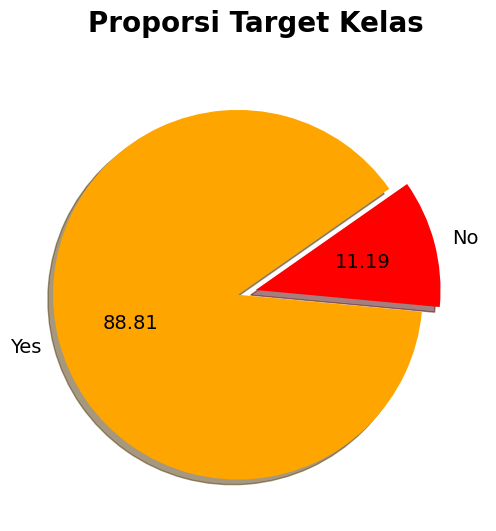

In [78]:
# Distribusi of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Yes","No"],
        shadow=True,
        textprops={'fontsize': 14},
        colors=["orange","red"],
        startangle=35)

plt.title("Proporsi Target Kelas",fontsize=20, fontweight='bold', pad=20)
plt.show()

In [79]:
# Implementasi Smote
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

class_distribution_before = y_train.value_counts().reset_index()
class_distribution_before.columns = ['Loan Status', 'Count']

# Data setelah SMOTE
class_distribution_after = pd.Series(y_smote).value_counts().reset_index()
class_distribution_after.columns = ['Loan Status', 'Count']

# Plotting distribusi kelas sebelum dan sesudah SMOTE menggunakan plotly.express
fig = px.bar(class_distribution_before, x='Loan Status', y='Count', title='Sebelum SMOTE',
            labels={'Loan Status': 'Loan Status', 'Count': 'Jumlah Sampel'},
            color='Loan Status', color_discrete_sequence=['red'])
fig.update_layout(showlegend=False)

fig2 = px.bar(class_distribution_after, x='Loan Status', y='Count', title='Setelah SMOTE',
            labels={'Loan Status': 'Loan Status', 'Count': 'Jumlah Sampel'},
            color='Loan Status', color_discrete_sequence=['blue'])
fig2.update_layout(showlegend=False)

fig.show()
fig2.show()

# Data Modelling 🎯

* Choose a machine learning model that suits your type problems and goals to be achieved.
* Perform model training on the training set.
* Adjust model parameters using techniques such as cross-validation or grid search.
* Evaluate model performance using metrics relevant such as accuracy, precision, recall, or ROC-AUC.
* Checking for overfitting or underfitting of the model and take appropriate action.

## Baseline Model Build

In [80]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []

## Model Building - Unscaled Data

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

### Logistic Regression


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 71.94287142700917
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 71.94177717666014
Mean Precision Score of LogisticRegression() model is: 0.6961748830178968
Mean Recall Score of LogisticRegression() model is: 0.7787876727022884
Mean ROC_AUC Score of LogisticRegression() model is: 0.8055521186729863
Mean f1 Score of LogisticRegression() model is: 0.7351344650457923

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70    331279
           1       0.70      0.78      0.74    331279

    accuracy                           0.72    662558
   macro avg       0.72      0.72      0.72    662558
weighted avg       0.72      0.72      0.72    662558


-------

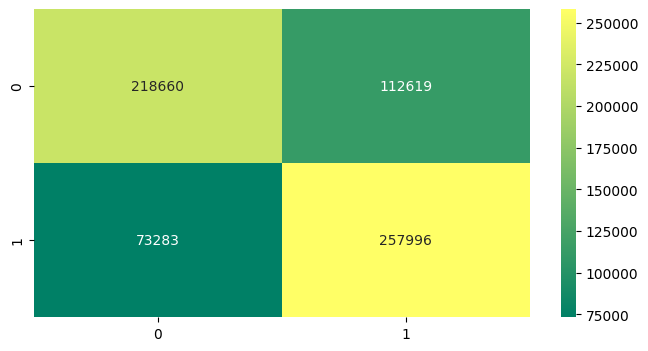

In [82]:
model_prediction(LogisticRegression(), x_smote, y_smote, n_splits=5, random_state=42)

### Light Gradient Boosting Machine

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 265023, number of negative: 265023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2374
[LightGBM] [Info] Number of data points in the train set: 530046, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 265023, number of negative: 265023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2374
[

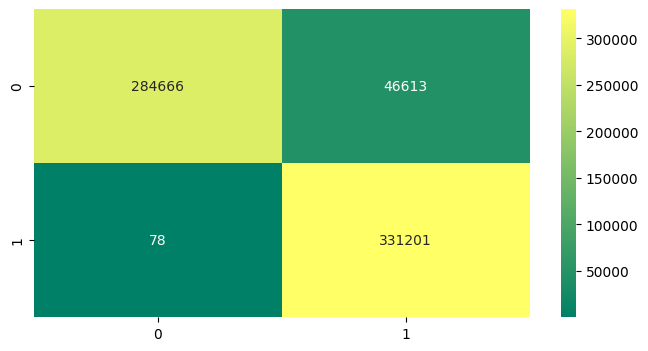

In [83]:
model_prediction(LGBMClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

### Random Forest


------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 88.30141411426601
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 86.01682165810523
Mean Precision Score of RandomForestClassifier() model is: 0.8224676249569186
Mean Recall Score of RandomForestClassifier() model is: 0.9189786663084052
Mean ROC_AUC Score of RandomForestClassifier() model is: 0.9123688063201937
Mean f1 Score of RandomForestClassifier() model is: 0.8679692587642788

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    331279
           1       0.89      0.98      0.93    331279

    accuracy                           0.93    662558
   macro avg       0.94      0.93      0.93    662558
weighted avg       0.94      0.93  

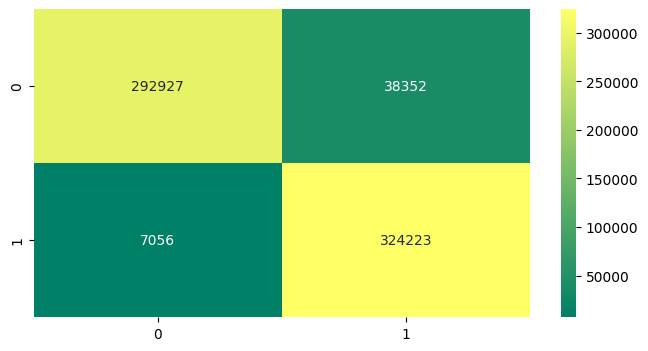

In [84]:
model_prediction(RandomForestClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

### Extra Trees


------------------------------------------------------------------------
Mean Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 91.22602285316093
Mean Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 87.96818540167678
Mean Precision Score of ExtraTreesClassifier() model is: 0.8461256671023427
Mean Recall Score of ExtraTreesClassifier() model is: 0.9301200807205576
Mean ROC_AUC Score of ExtraTreesClassifier() model is: 0.9283647606552906
Mean f1 Score of ExtraTreesClassifier() model is: 0.8859140596051699

------------------------------------------------------------------------
Classification Report of ExtraTreesClassifier() model is:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94    331279
           1       0.92      0.96      0.94    331279

    accuracy                           0.94    662558
   macro avg       0.94      0.94      0.94    662558
weighted avg       0.94      0.94      0.94    66

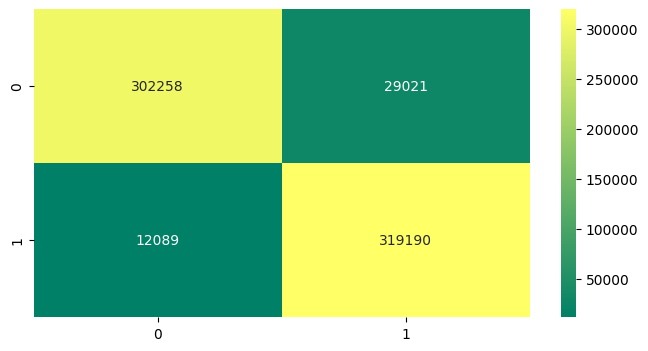

In [85]:
model_prediction(ExtraTreesClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## Loan Status Distribution

In [ ]:
# Instantiate the ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(x_smote, y_smote)
et_pred = et_model.predict(df_train_feat)

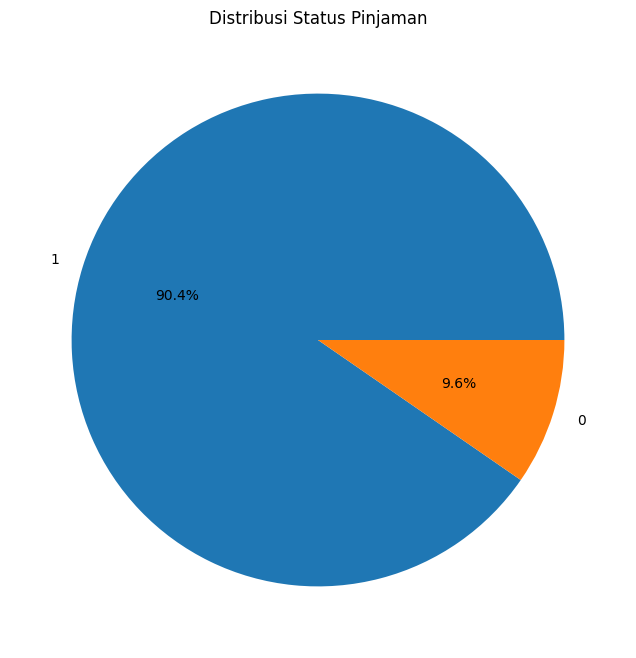

In [89]:
df_final = pd.DataFrame()
df_final['loan_status'] = et_pred

# Menghitung frekuensi setiap kategori
value_counts = df_final['loan_status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Status Pinjaman')
plt.show()

# Evaluation ✔️

* Evaluate model performance against dataset separate testing.
* Analyze the evaluation metrics obtained for evaluate how well the model works.
* Prepare a summary of the evaluation results and present it clearly.

Based on the modeling results obtained, it is known that:

- **Evaluate Model Performance Against Split Test Dataset**:
   - The model shows **95.98%** average accuracy on test data, indicating excellent performance.
   - The confusion matrix shows a high number of **True Positive** and **True Negative**, indicating accurate predictions.

- **Evaluation Metrics Analysis**:
   - High **Precision** (0.958764273972426) indicates that the model has a low **False Positive** rate.
   - High **recall** indicates that the model was successful in identifying the majority of true positive cases.
   - A high **F1-score** indicates a good balance between precision and recall.

- **Summary of Evaluation Results**:
   - The **ExtraTreesClassifier** model has excellent performance with high accuracy on both training and testing datasets.
   - High precision, recall and f1-score scores indicate that the model has strong predictive power.
   - The confusion matrix confirms good performance by showing high numbers on the main diagonal compared to off-diagonal elements.

This summary shows that the classification model used works well and may not require further tuning, unless there is a specific goal to be achieved or to improve performance in certain cases.